Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

First Few Rows of Data:
   fixed acidity  volatile acid

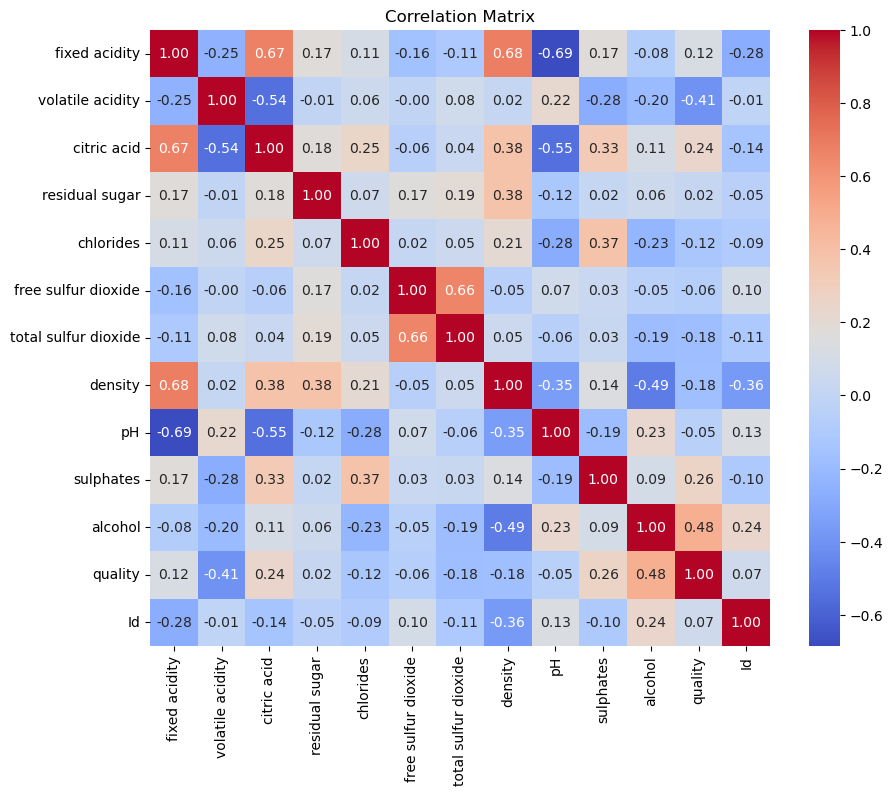

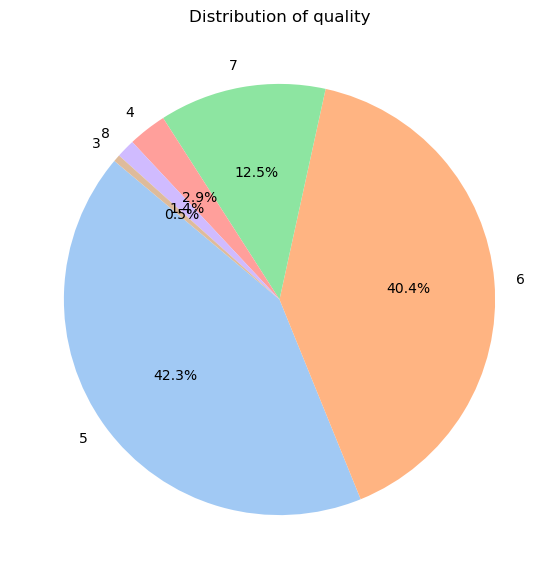

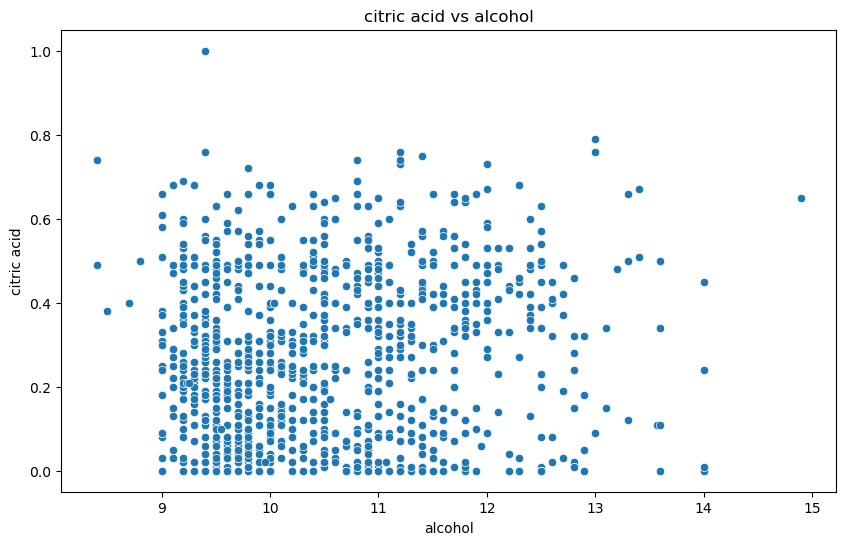

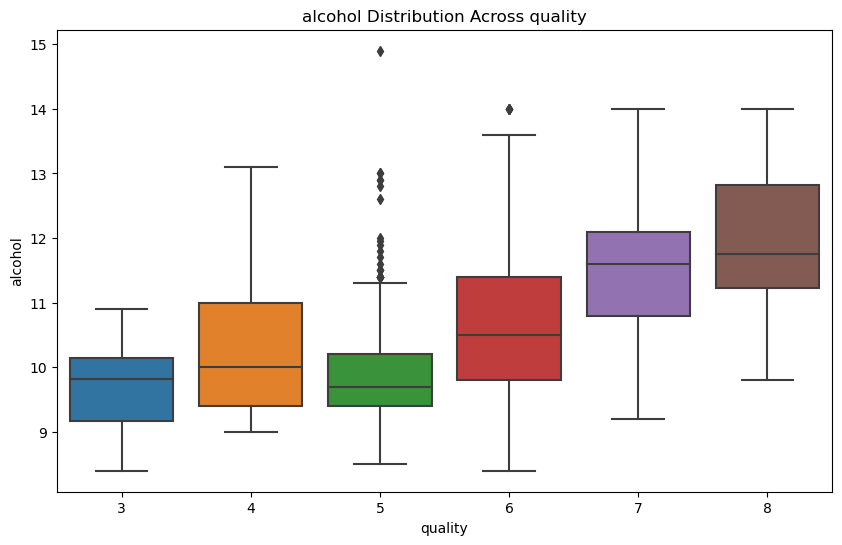

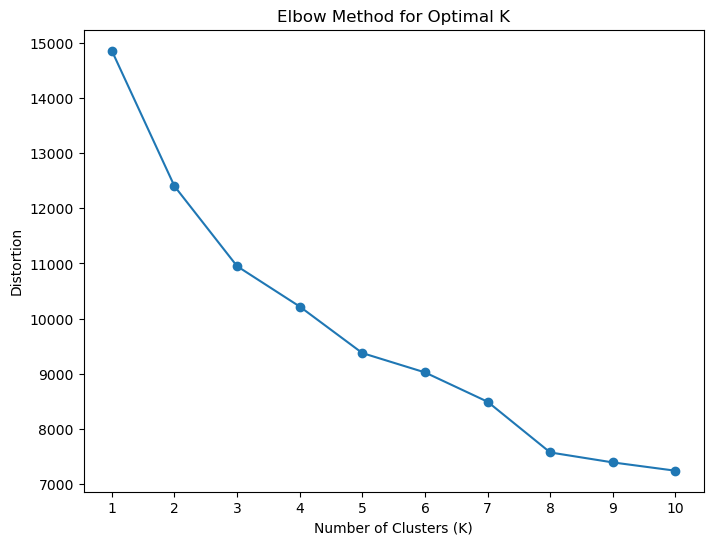

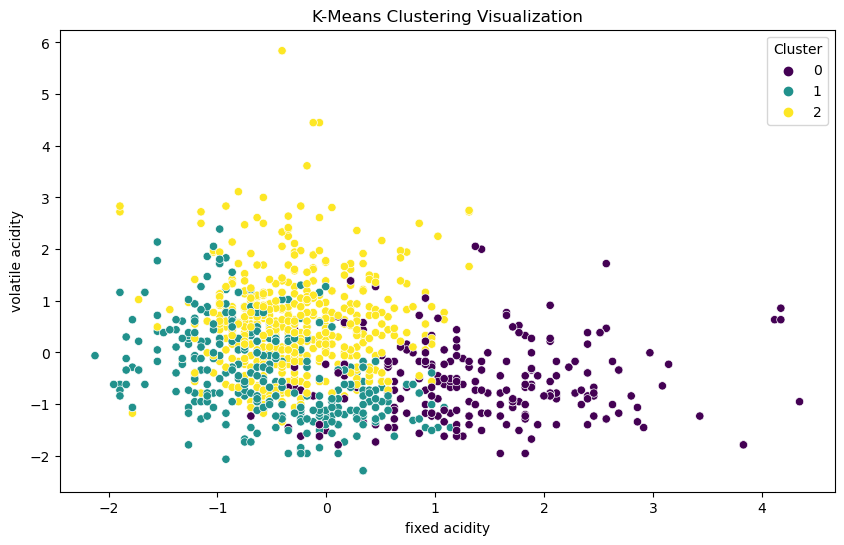

Mean Squared Error for quality prediction: 0.47
Silhouette Score for 3 clusters: 0.16


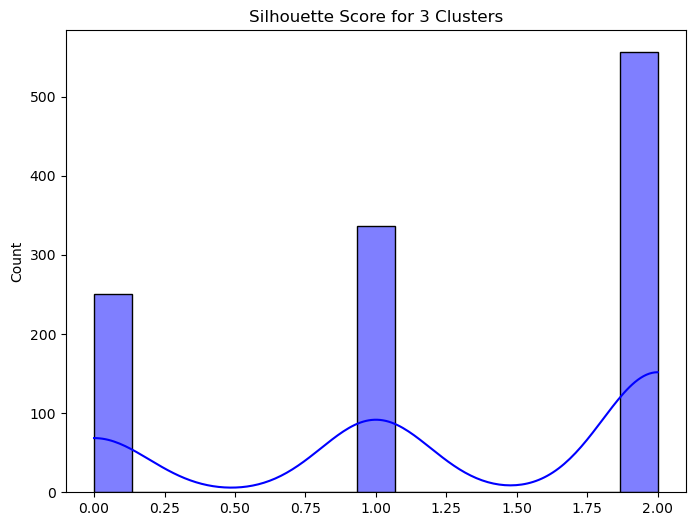

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('WineQT.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of data
print("\nFirst Few Rows of Data:")
print(df.head())

# Data Cleaning: Drop rows with missing values
df.dropna(inplace=True)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Correlation Matrix: Selecting numeric columns and visualizing their correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 1. Pie Chart: Distribution of a categorical column (e.g., "quality")
def create_pie_plot(data, column_name):
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=(7, 7))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Example: Pie chart for 'quality' column
create_pie_plot(df, 'quality')

# 2. Scatter Plot: Relationship between two numeric columns (e.g., 'alcohol' and 'citric acid')
def create_scatter_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column)
    plt.title(f'{y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example: Scatter plot for 'alcohol' vs 'citric acid'
create_scatter_plot(df, 'alcohol', 'citric acid')

# 3. Box Plot: Distribution of a numeric column (e.g., 'alcohol') across a categorical column (e.g., 'quality')
def create_box_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_column, y=y_column)
    plt.title(f'{y_column} Distribution Across {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example: Box plot for 'quality' vs 'alcohol'
create_box_plot(df, 'quality', 'alcohol')

# 4. Elbow Method for K-Means clustering to find the optimal number of clusters
def plot_elbow_method(data, feature_columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[feature_columns])

    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.xticks(K)
    plt.show()

plot_elbow_method(df, numeric_columns)

# 5. K-Means Clustering: Perform K-Means clustering and visualize the clusters
def perform_kmeans(data, feature_columns, n_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[feature_columns])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualizing the clustering (using the first two features for simplicity)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('K-Means Clustering Visualization')
    plt.xlabel(feature_columns[0])
    plt.ylabel(feature_columns[1])
    plt.show()

perform_kmeans(df, numeric_columns, n_clusters=3)

# 6. Linear Regression: Predicting a numeric column (e.g., 'quality') based on other columns (e.g., 'alcohol', 'citric acid')
def perform_linear_regression(data, x_columns, y_column):
    X = data[x_columns]
    y = data[y_column]

    model = LinearRegression()
    model.fit(X, y)

    # Predictions and evaluation
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    print(f"Mean Squared Error for {y_column} prediction: {mse:.2f}")

    # Plotting the regression line (if applicable)
    if len(x_columns) == 1:  # Only plot if there's one feature
        plt.figure(figsize=(10, 6))
        plt.scatter(X[x_columns[0]], y, color='blue', label='Actual Data')
        plt.plot(X[x_columns[0]], predictions, color='red', label='Regression Line')
        plt.title(f"Linear Regression: {y_column} vs {x_columns[0]}")
        plt.xlabel(x_columns[0])
        plt.ylabel(y_column)
        plt.legend()
        plt.show()

perform_linear_regression(df, ['alcohol', 'citric acid'], 'quality')  # Replace with relevant columns in your dataset

# 7. Silhouette Score for K-Means Clustering
def plot_silhouette_score(data, feature_columns, n_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[feature_columns])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, clusters)

    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")

    plt.figure(figsize=(8, 6))
    sns.histplot(clusters, kde=True, color="blue", bins=15)
    plt.title(f"Silhouette Score for {n_clusters} Clusters")
    plt.show()

# Example: Silhouette score for 3 clusters (adjust based on optimal clusters from elbow method)
plot_silhouette_score(df, numeric_columns, n_clusters=3)

# Optionally, save the cleaned and processed data
df.to_csv("cleaned_WineQT_data.csv", index=False)


In [2]:
#Descriptive Statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Cluster
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379,1.266842
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116,0.797112
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000,1.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000,1.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000,2.000000


In [3]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   